In [366]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [367]:
#Dataset

cars = pd.read_csv("D://Data/cars_price.csv")
cars.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [368]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           40000 non-null  int64  
 1   make                 40000 non-null  object 
 2   model                40000 non-null  object 
 3   priceUSD             40000 non-null  int64  
 4   year                 40000 non-null  int64  
 5   condition            40000 non-null  object 
 6   mileage(kilometers)  40000 non-null  float64
 7   fuel_type            40000 non-null  object 
 8   volume(cm3)          39970 non-null  float64
 9   color                40000 non-null  object 
 10  transmission         40000 non-null  object 
 11  drive_unit           38655 non-null  object 
 12  segment              36245 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.0+ MB


<b> segment, drive_unit,volumne(cm3)</b> have some missing values

In [369]:
#Dropping the unnames column because its type id column
cars.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [370]:
#Treating the missing values
cars.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64



We can treat missing values in the following ways - <br> 
1 - Ignore them <br>
2 - Replace them with mean if the feature is continous <br>
3 - Replace them with the most occured value if the feature is categorical <br>
4 - Use a model to predict the missing values <br>

drive_unit and segment are categorical variables, replacing the missing values with most frequently occured 
value will result in a bias. So removing the missing values.

In [371]:
cars.dropna(inplace = True)

In [372]:
#Importing module to check for correlation between price and other varibles
from scipy.stats.stats import pearsonr
import matplotlib

Correlation coefficient between Price of the car and mileage(kilometers) -   -17.909839566579926 %
Correlation coefficient between Price of the car and volumn(cm3) -  26.877259550342387 %


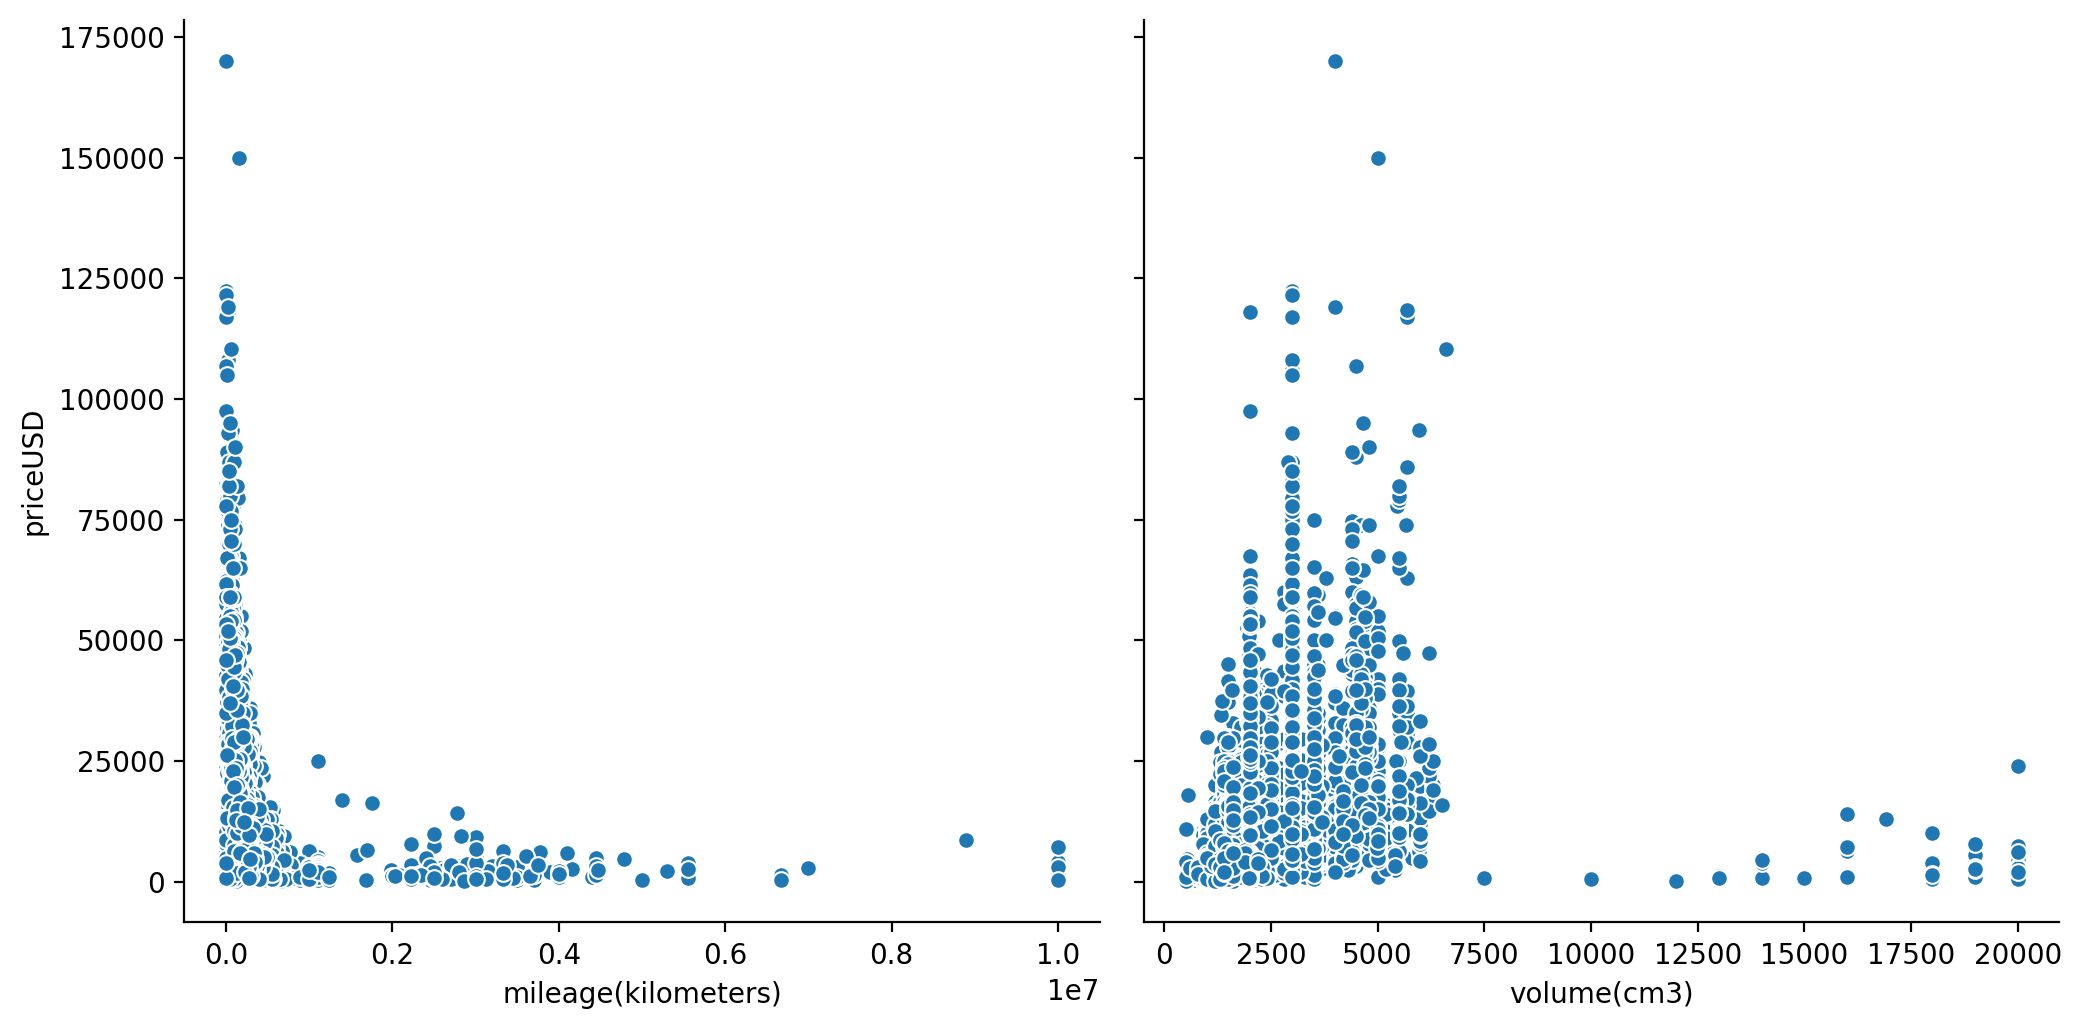

In [373]:
#Checking for correlation

sns.pairplot(cars, x_vars = ['mileage(kilometers)','volume(cm3)'], y_vars = ["priceUSD"], height = 5,kind = "scatter")

Pers_coff, p_value = pearsonr(cars["mileage(kilometers)"],cars['priceUSD'])
print('Correlation coefficient between Price of the car and mileage(kilometers) -  ',Pers_coff*100,'%')

Pers_coff, p_value = pearsonr(cars["volume(cm3)"],cars['priceUSD'])
print('Correlation coefficient between Price of the car and volumn(cm3) - ',Pers_coff*100,'%')

Car price and mileage are <b>negatively correlated </b> and
Car price and volume are <b>positively correlated </b> <br>

This is intutive understood because the less mileage car has covered, higher will be its price.<br> 
0 mileage being car is new and unused. <br>
It's also intersting that correlation isn't that high

Correlation coefficient between Price of the car and mileage(kilometers) -   64.30669311502896 %


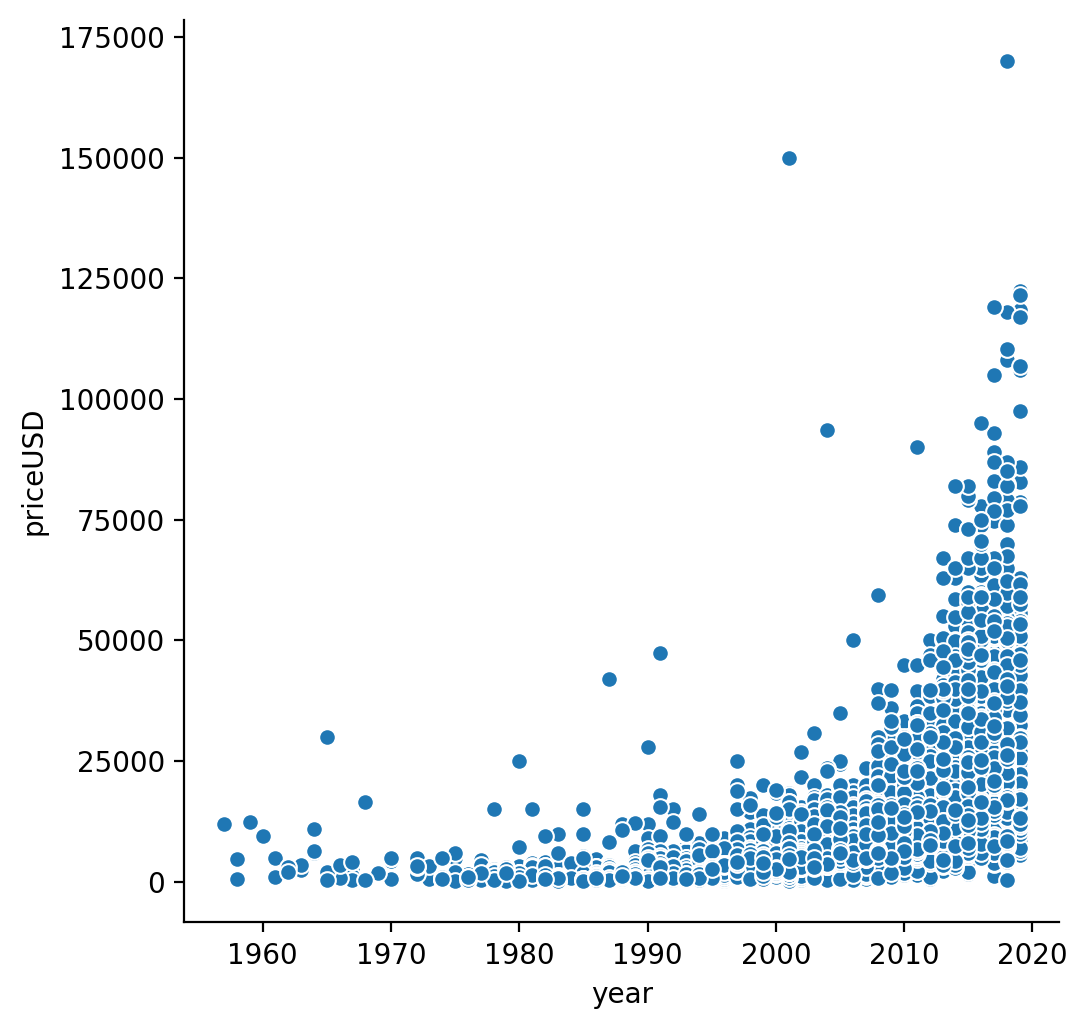

In [374]:
#Checking for correlation

sns.pairplot(cars, x_vars = ['year'], y_vars = ["priceUSD"], height = 5,kind = "scatter")

Pers_coff, p_value = pearsonr(cars["year"],cars['priceUSD'])
print('Correlation coefficient between Price of the car and mileage(kilometers) -  ',Pers_coff*100,'%')

As expected, correlation between year and price is positive and more than 50 percent. 

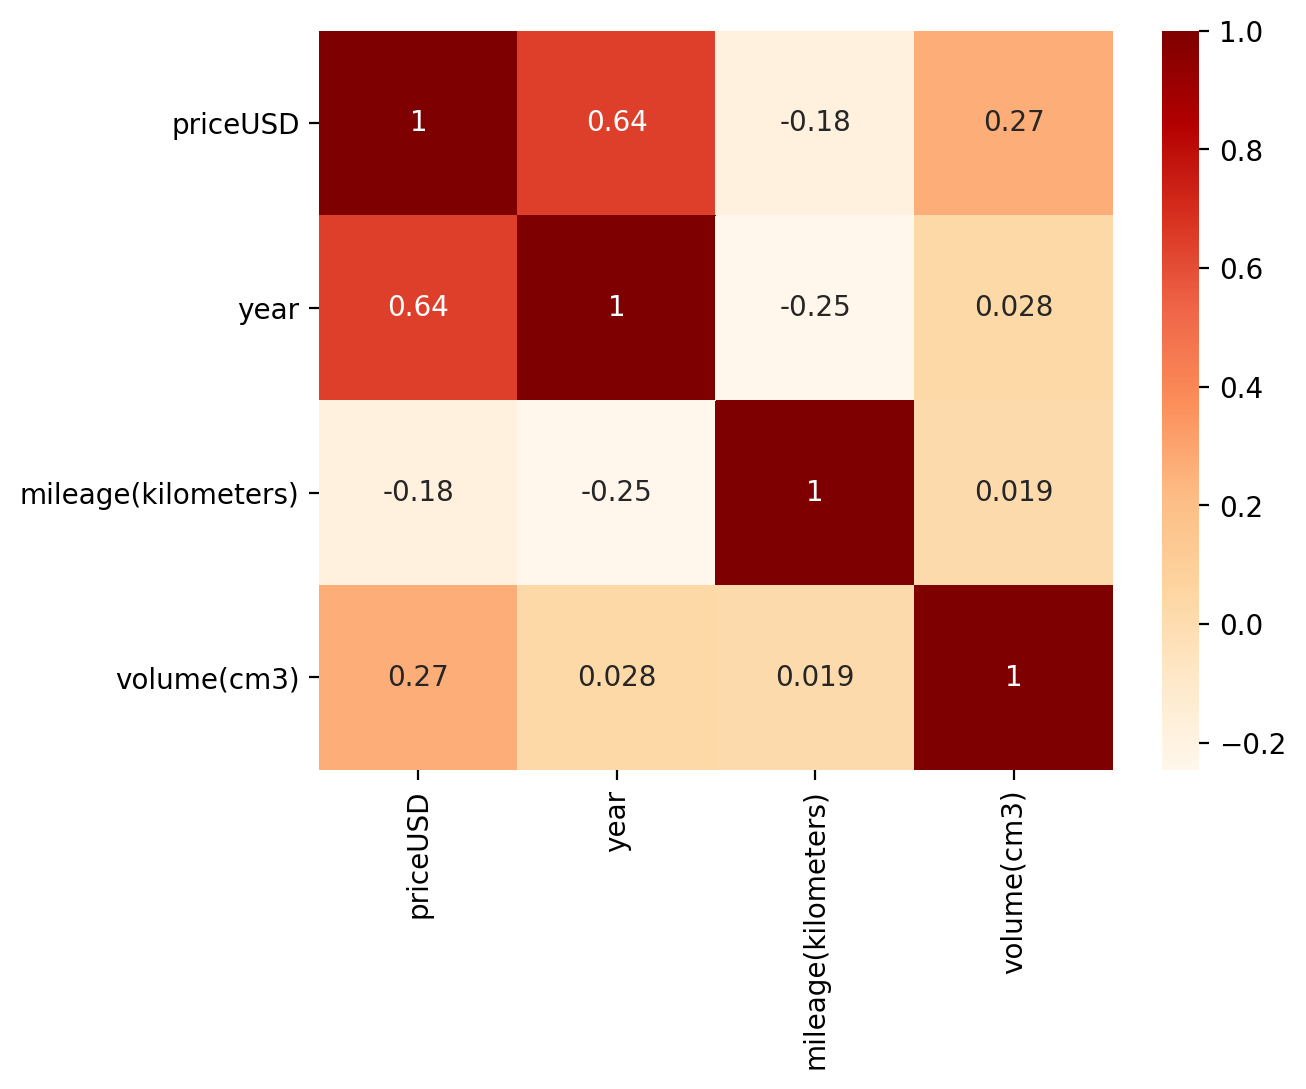

In [375]:
sns.heatmap(cars.corr(),cmap="OrRd",annot=True)
plt.show()

Correlation of volumn with mileage and year is very less<br>
Correlation of mileage and year is not insignificant, one of these features will be removed based on further analysis


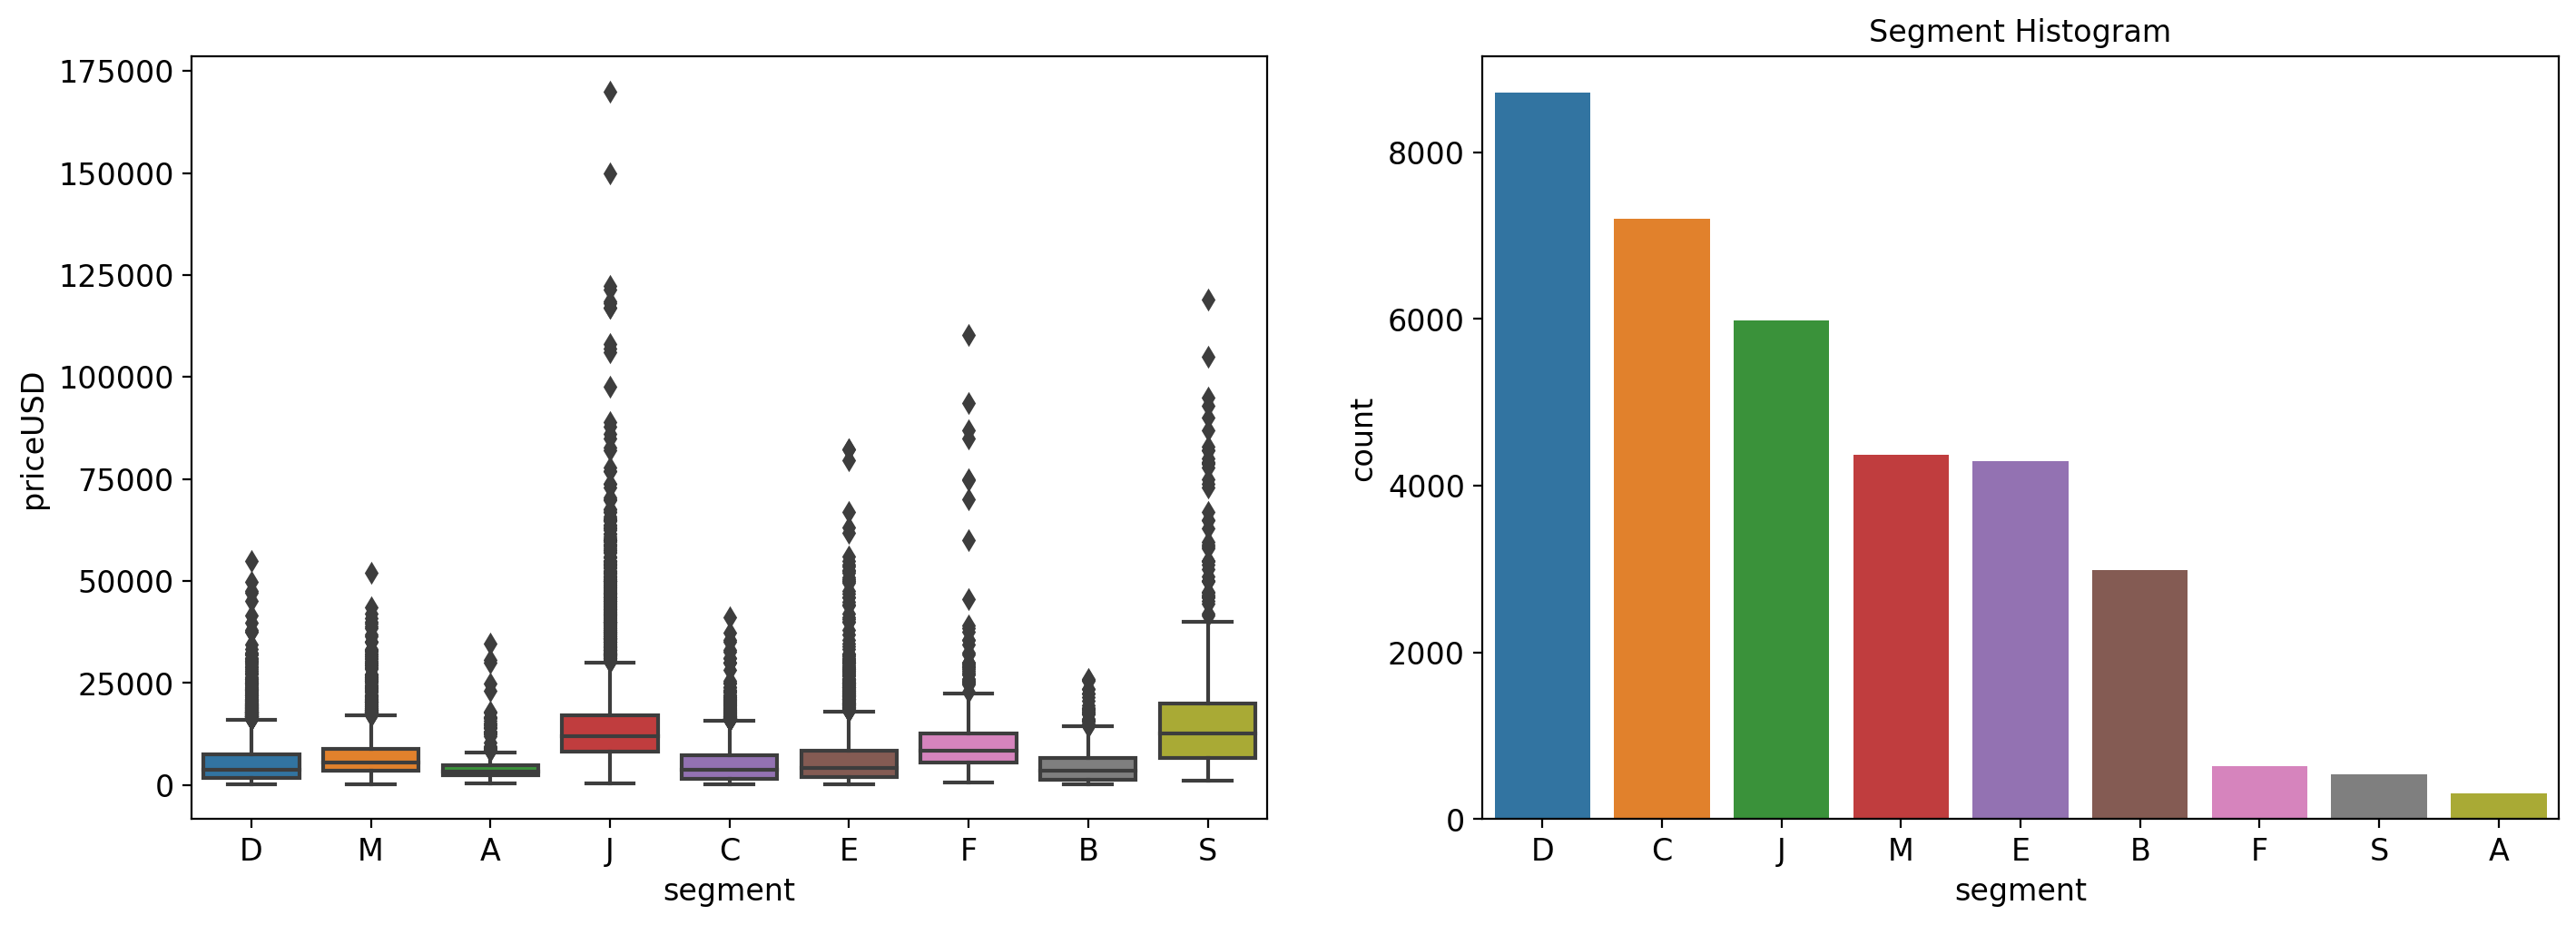

In [376]:
#categorical variables

#price and segment

#changing the font size 
import matplotlib.pylab as pylab
params = {'legend.fontsize': 12,
         'axes.labelsize': 12,
         'axes.titlesize': 12,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
pylab.rcParams.update(params)

plt.figure(figsize=(26, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'segment', y = 'priceUSD', data = cars)


plt.subplot(2,3,2)
plt.title('Segment Histogram')
order = cars['segment'].value_counts(ascending=False).index
sns.countplot(x='segment', data=cars, order=order)

plt.show()

<b> Segment J,S have more cars with higher price than other segments </b> <br>
<b> While Segment A and B have lower prices </b><br>
Cars with segment D are sold more, thr histogram on the right shows a descending order of number of cars sold based on segment.
<br> Car with segment being cheap is still sold less, says a lot about what customers want

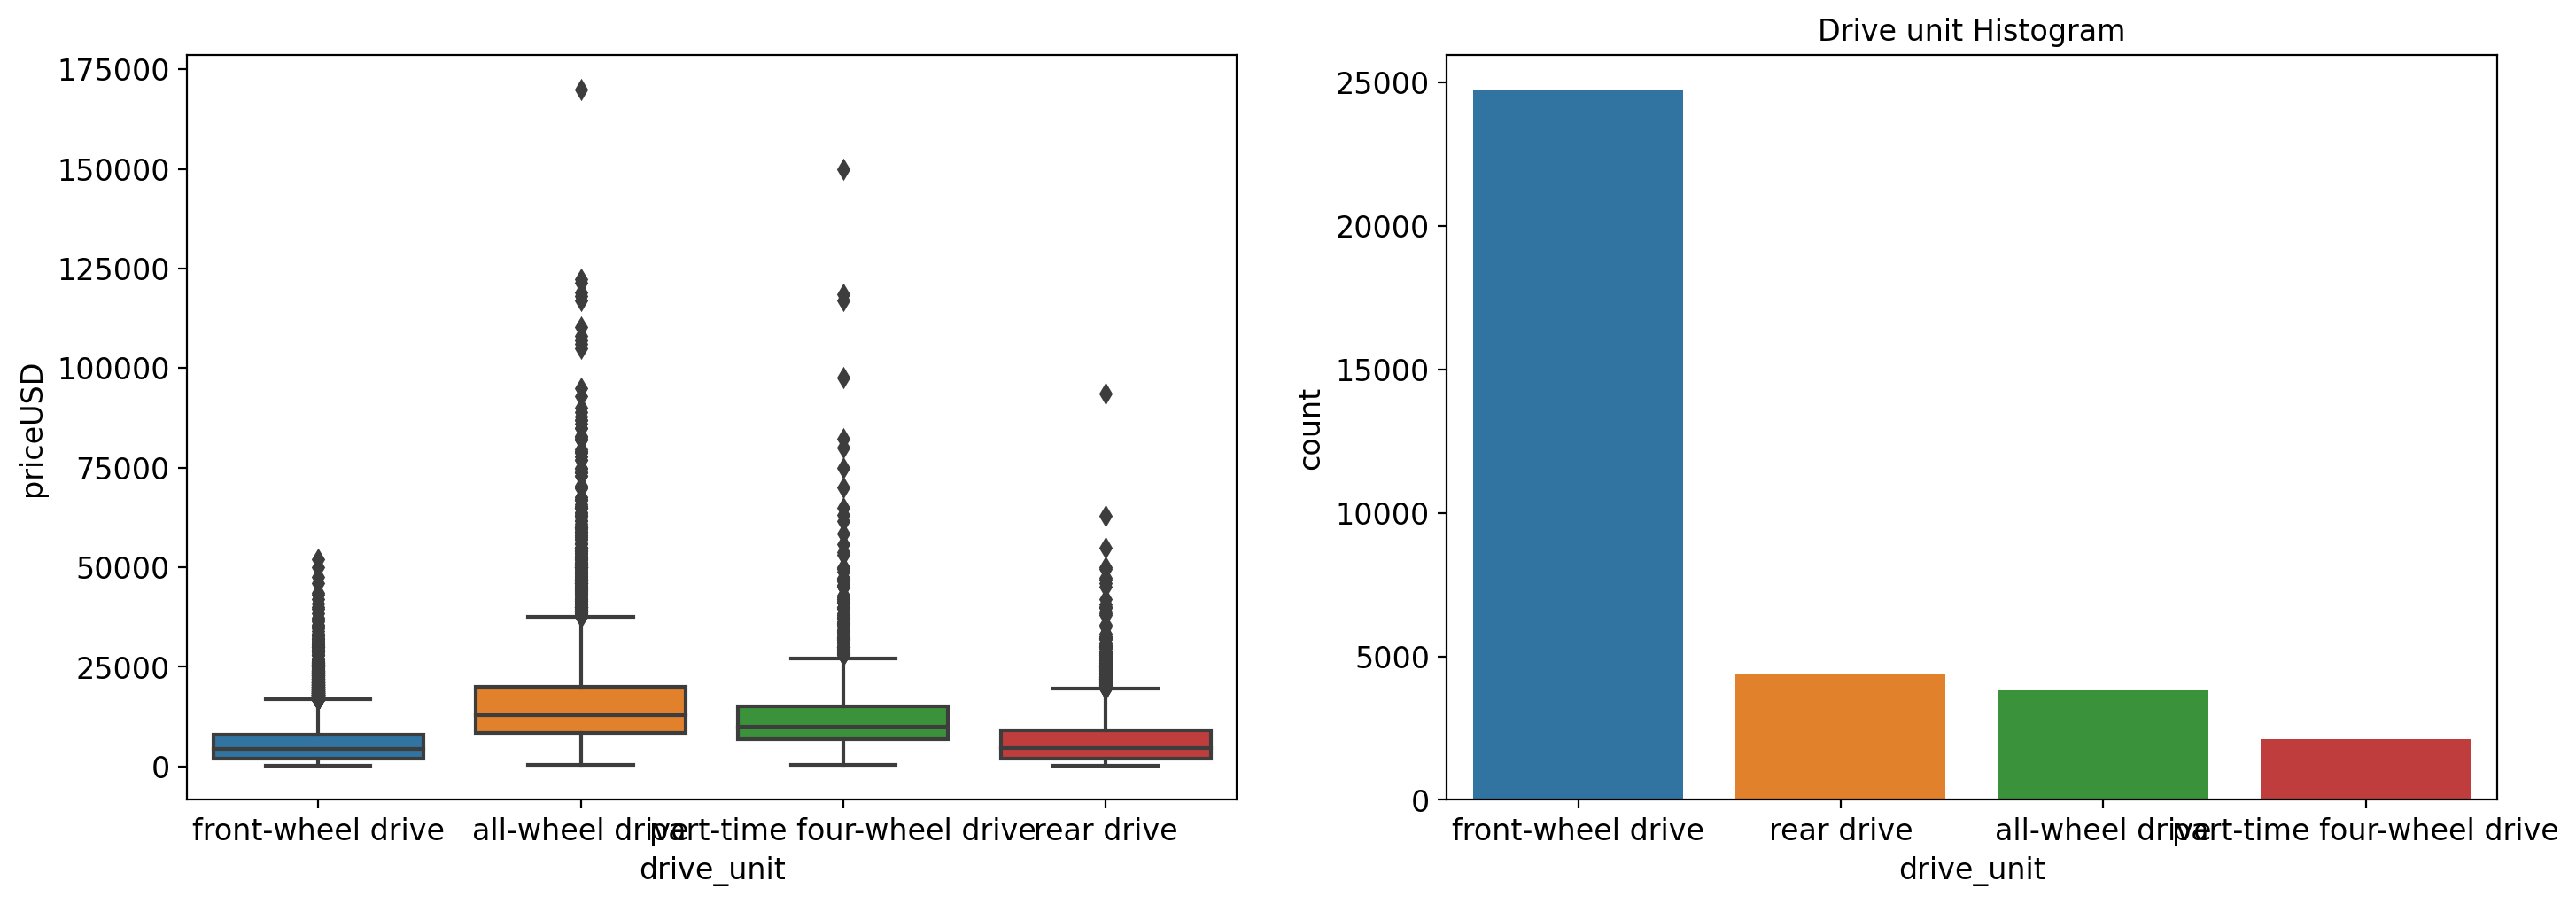

In [377]:
#price and segment
plt.figure(figsize=(26, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'drive_unit', y = 'priceUSD', data = cars)


plt.subplot(2,3,2)
plt.title('Drive unit Histogram')
order = cars['drive_unit'].value_counts(ascending=False).index
sns.countplot(x='drive_unit', data=cars, order=order)

plt.show()

<b> All-wheel drive</b> and <b> part-time-four-wheel driver</b> are more expensive <br>
Compared to other drive_unit, <b>front-wheel drive</b> is relaively more spread around at the median

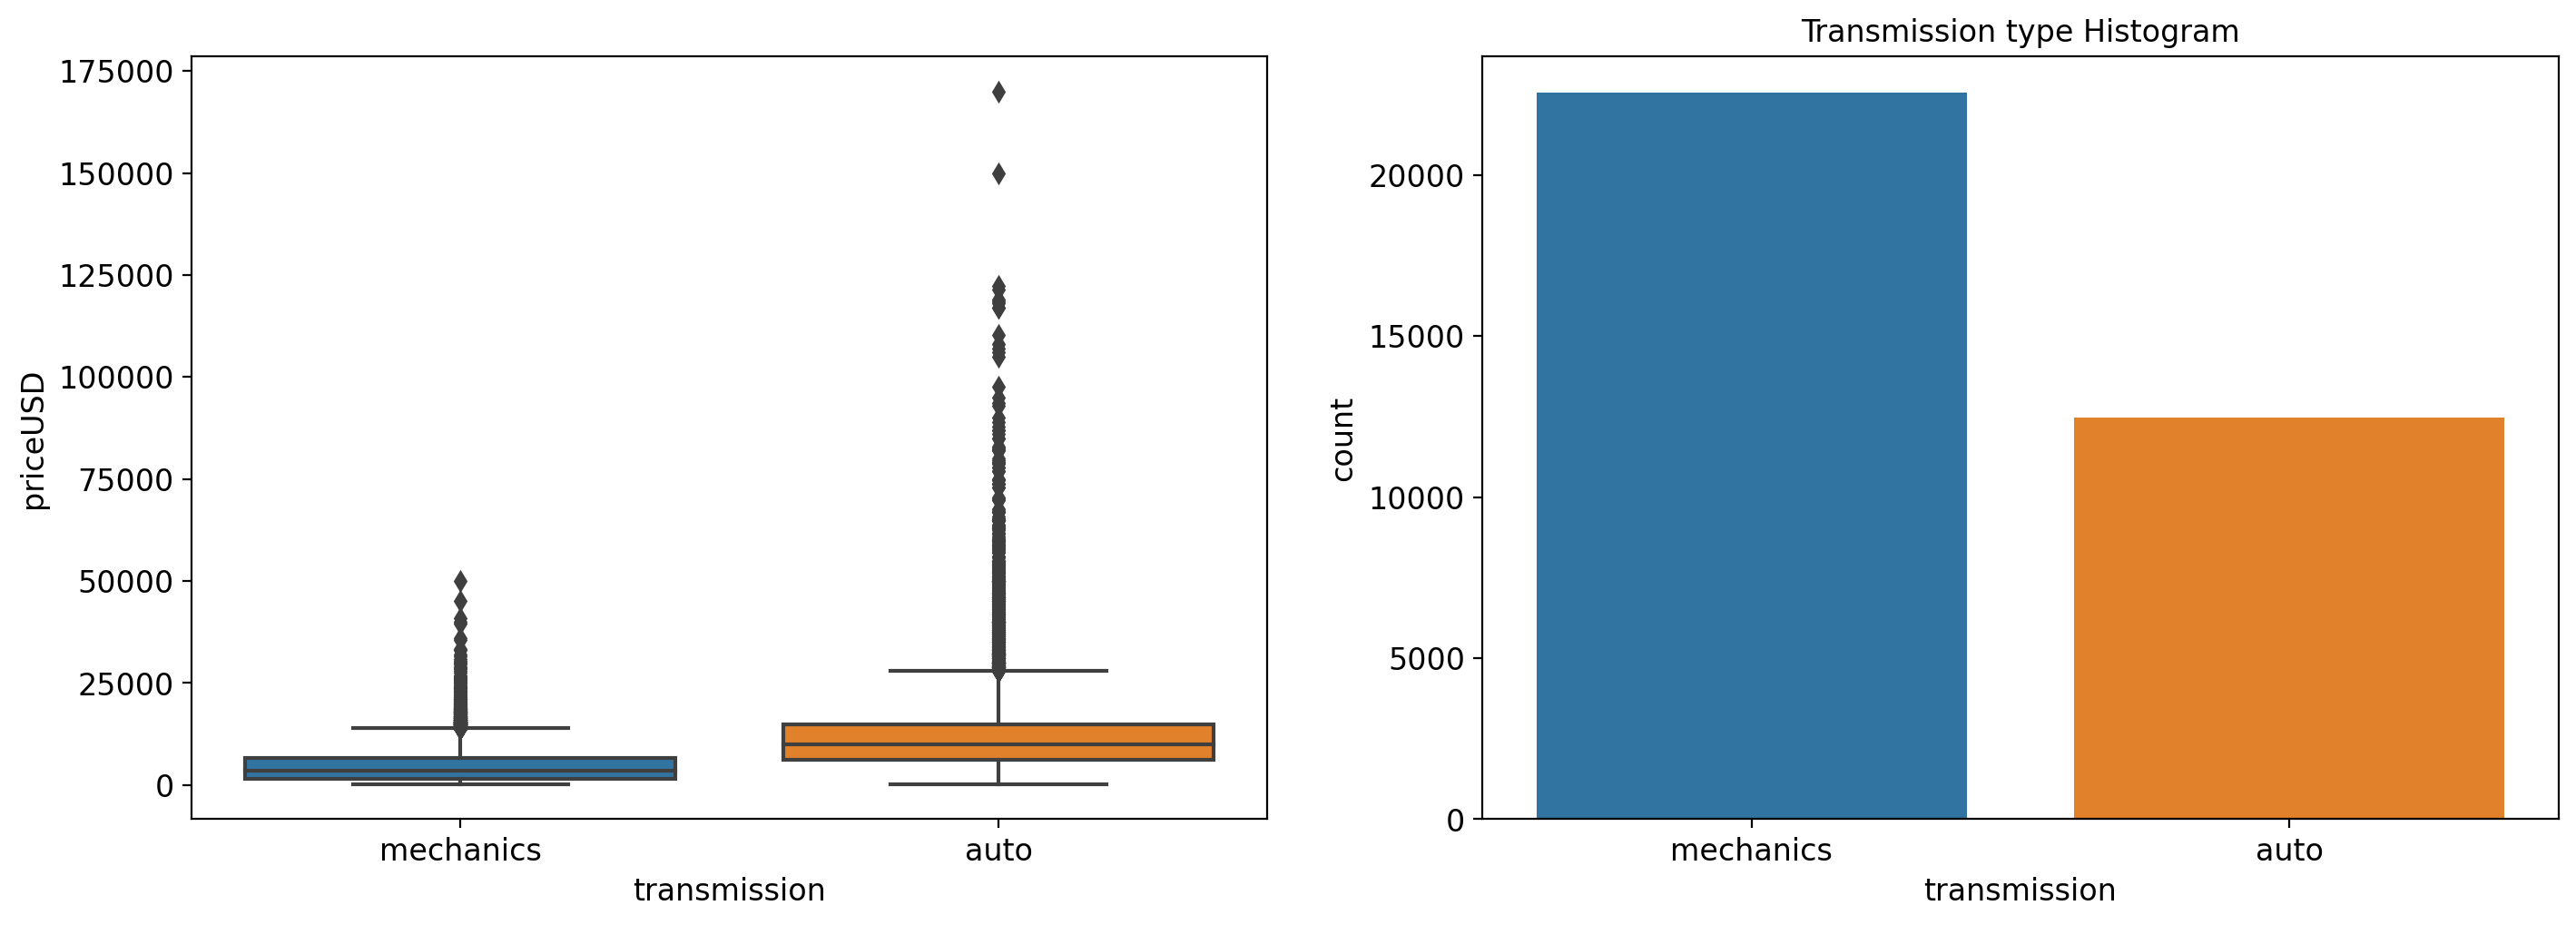

In [378]:
#price and transmission type
plt.figure(figsize=(26, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'transmission', y = 'priceUSD', data = cars)


plt.subplot(2,3,2)
plt.title('Transmission type Histogram')
order = cars['transmission'].value_counts(ascending=False).index
sns.countplot(x='transmission', data=cars, order=order)

plt.show()

<b> Auto transmission type cars </b> on average are more expensive which could explain why they are sold less <br> as is visible from the Histogram. 

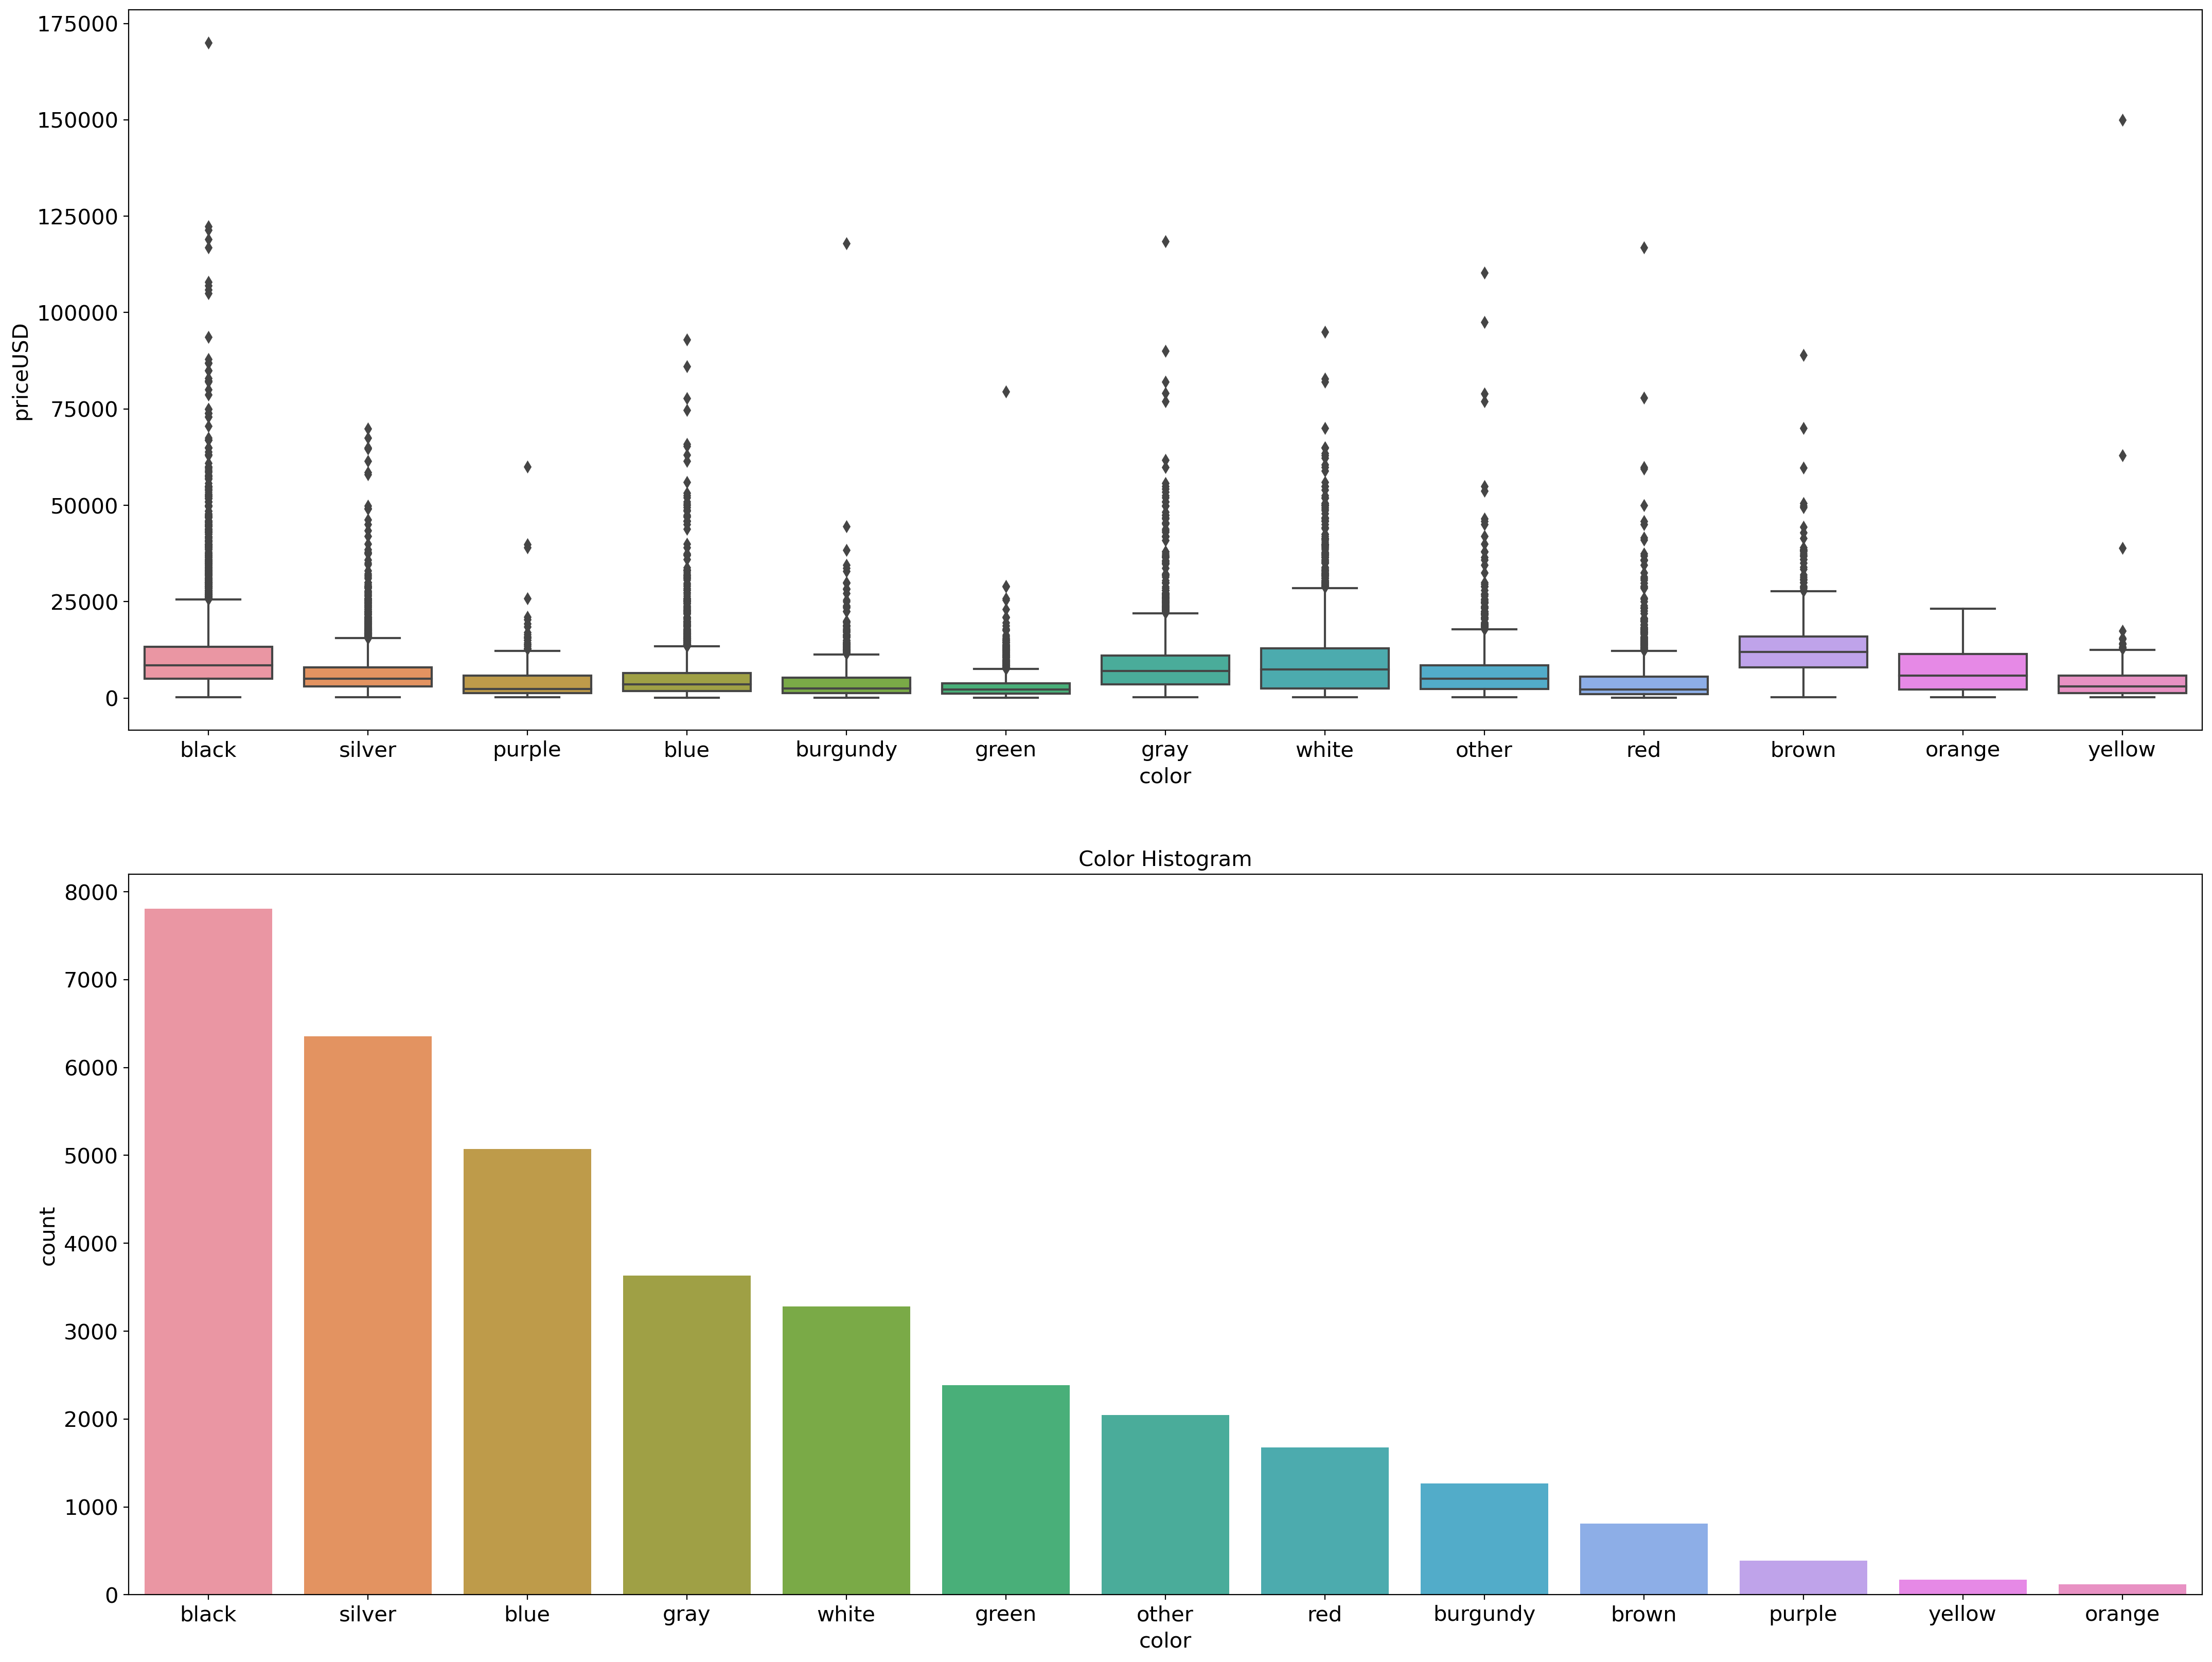

In [379]:
#changing the font size 
import matplotlib.pylab as pylab
params = {'legend.fontsize': 15,
         'axes.labelsize': 15,
         'axes.titlesize': 15,
         'xtick.labelsize':15,
         'ytick.labelsize':15}
pylab.rcParams.update(params)

#price and color
plt.figure(figsize=(26, 20))

plt.subplot(211)
sns.boxplot(x = 'color', y = 'priceUSD', data = cars)


plt.subplot(212)
plt.title('Color Histogram')
order = cars['color'].value_counts(ascending=False).index
sns.countplot(x='color', data=cars, order=order)
plt.show()

<b> Black cars </b> are sold more than the other colored cars.
Histogram shows a descending trend of number of sold cars based on color, <b> Orange cars </b> being the least sold cars

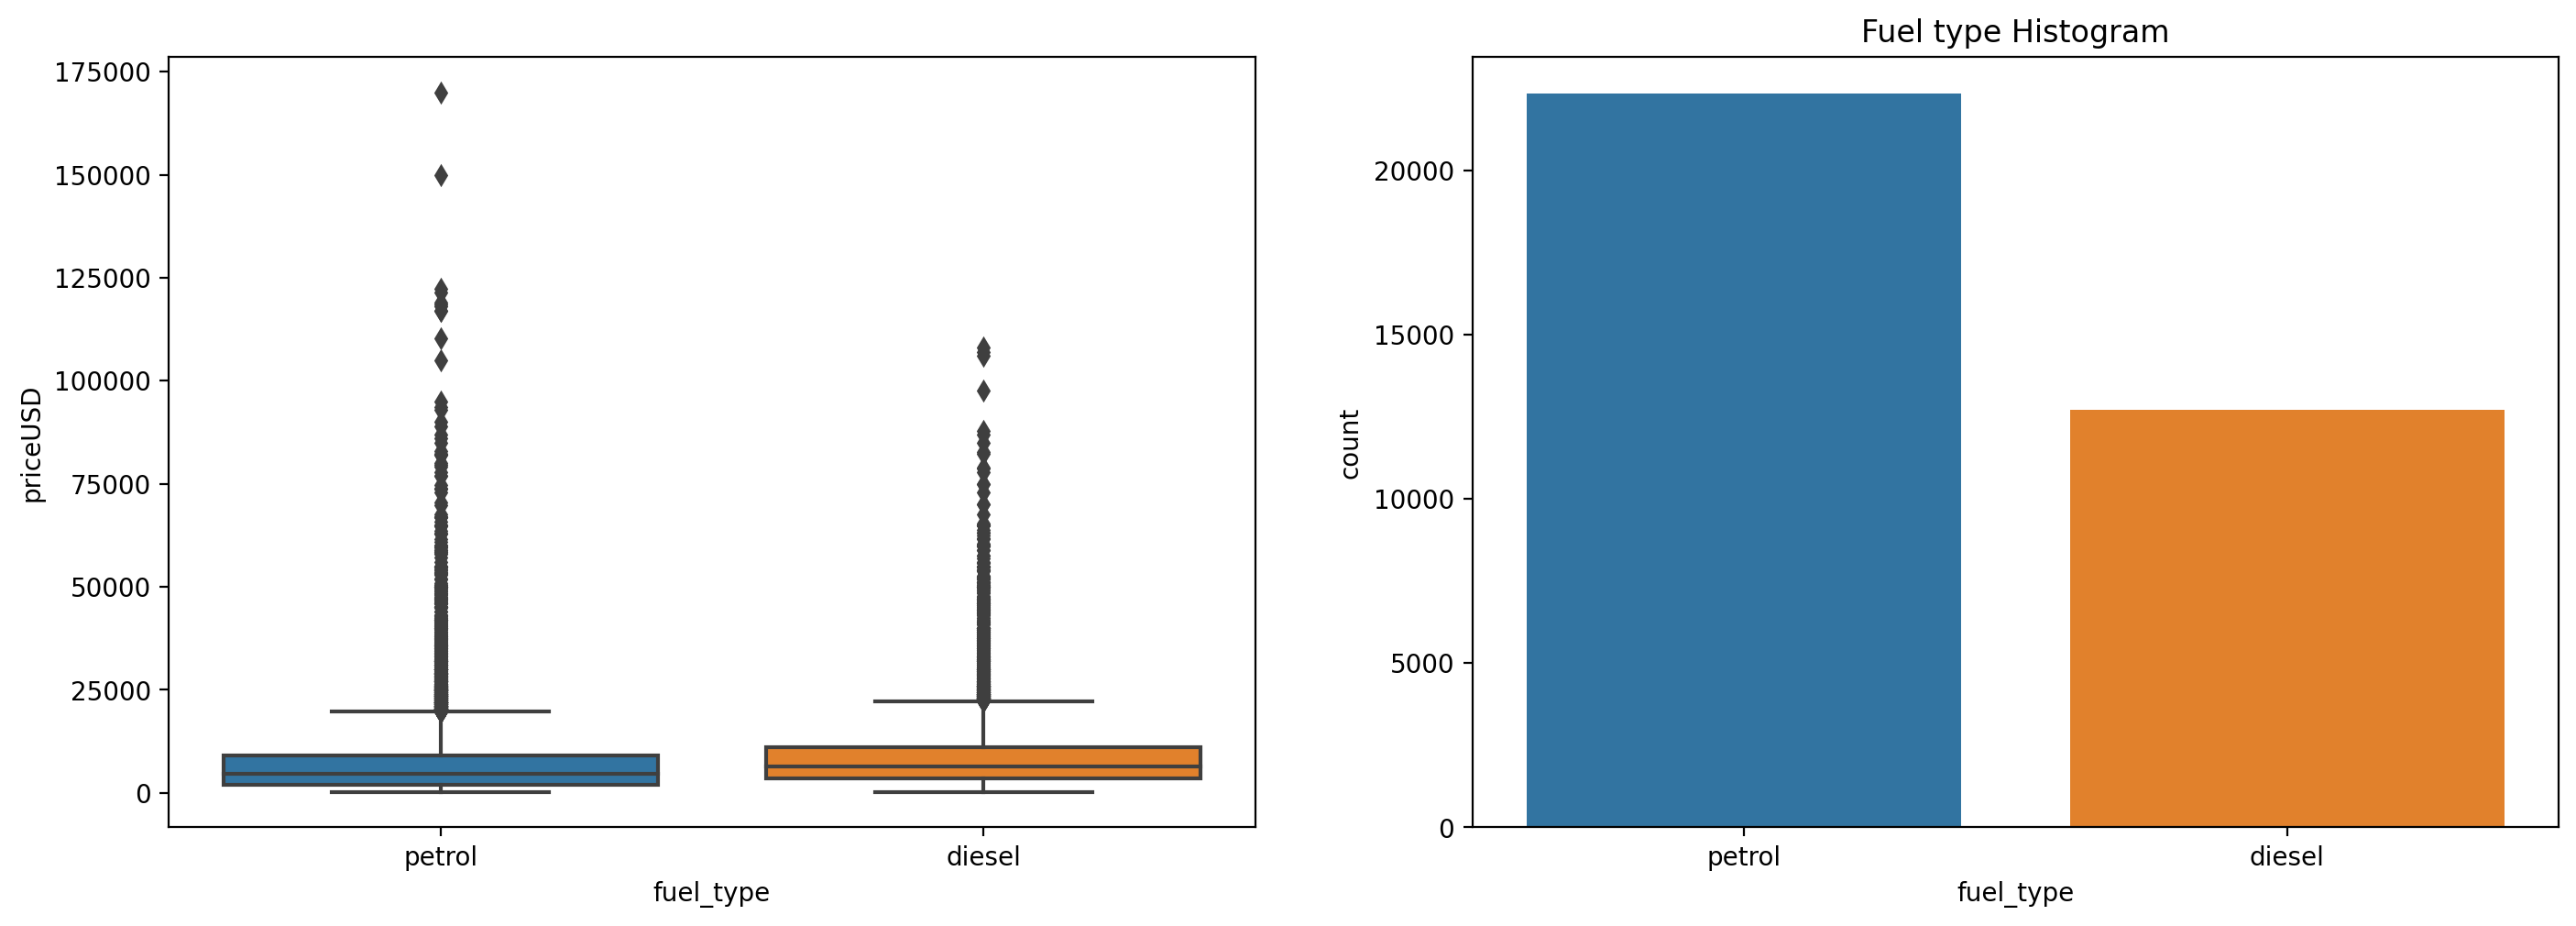

In [380]:
#price and fuel type
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.figure(figsize=(26, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'fuel_type', y = 'priceUSD', data = cars)


plt.subplot(2,3,2)
plt.title('Fuel type Histogram')
order = cars['fuel_type'].value_counts(ascending=False).index
sns.countplot(x='fuel_type', data=cars, order=order)

plt.show()

<b> Petrol Cars </b> are sold more than the diesel ones. The price of the cars based no their fuel type is almost same.

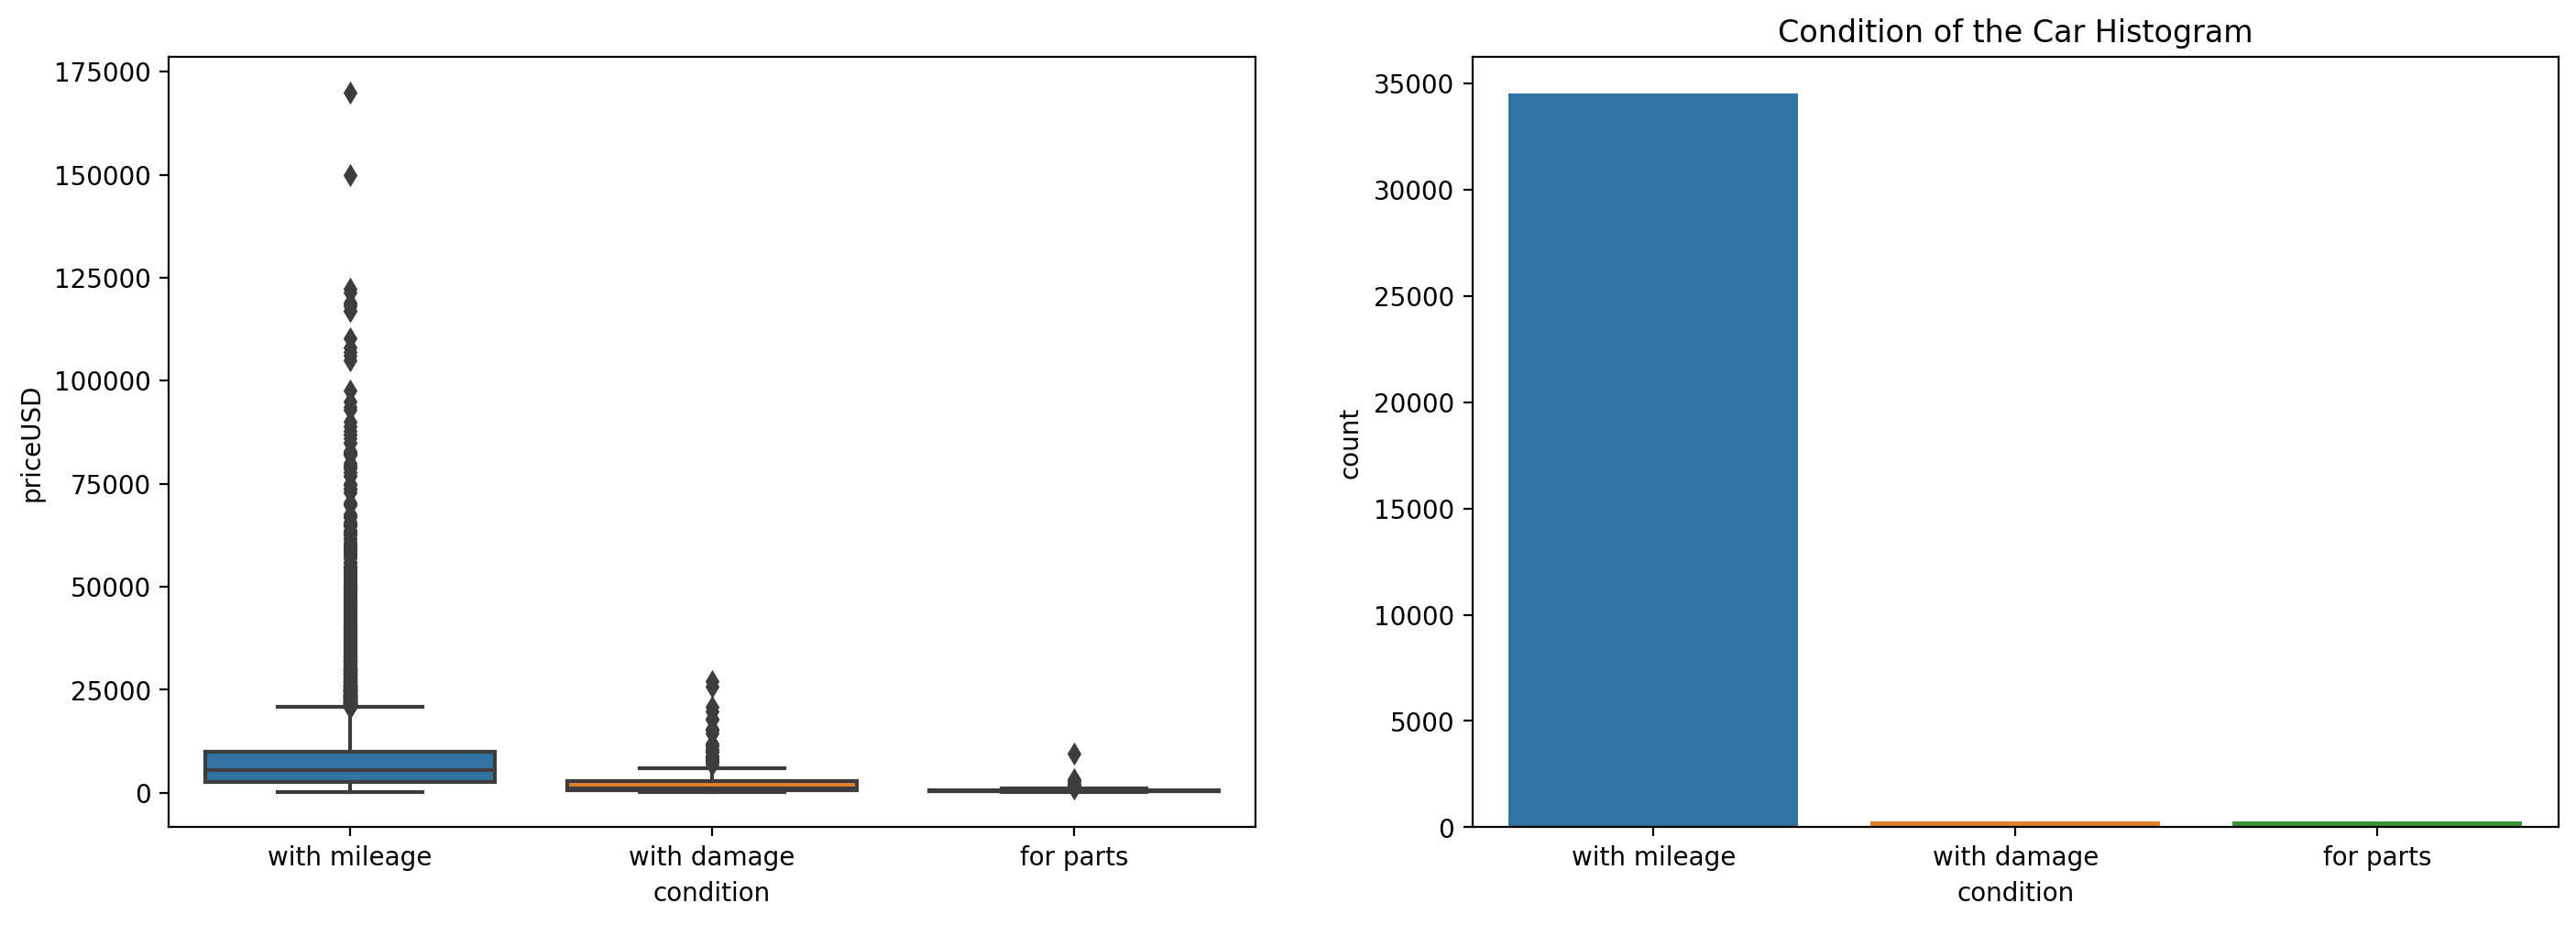

In [381]:
#price and fuel type
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.figure(figsize=(26, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'condition', y = 'priceUSD', data = cars)


plt.subplot(2,3,2)
plt.title('Condition of the Car Histogram')
order = cars['condition'].value_counts(ascending=False).index
sns.countplot(x='condition', data=cars, order=order)

plt.show()

As we could imagine, the price of cars with mileage is more than the price of cars with damage, least price is when the car is sold for parts. Cars with mileage are also sold more because there prices on average are higher than the cars with damage 

In [382]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35016 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 35016 non-null  object 
 1   model                35016 non-null  object 
 2   priceUSD             35016 non-null  int64  
 3   year                 35016 non-null  int64  
 4   condition            35016 non-null  object 
 5   mileage(kilometers)  35016 non-null  float64
 6   fuel_type            35016 non-null  object 
 7   volume(cm3)          35016 non-null  float64
 8   color                35016 non-null  object 
 9   transmission         35016 non-null  object 
 10  drive_unit           35016 non-null  object 
 11  segment              35016 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 4.7+ MB


In [383]:
#Removing the id columns
#Columns "make" and "model"
cars.drop(["make", "model"], axis = 1, inplace = True)

In [384]:
#Dealing with categorical variables

print("Unique values in \"Condition\"", cars["condition"].unique(), " in total ", len(cars["condition"].unique()))
print("Unique values in \"fuel type\"", cars["fuel_type"].unique(), " in total ", len(cars["fuel_type"].unique()))
print("Unique values in \"Color\"", cars["color"].unique(), " in total ", len(cars["color"].unique()))
print("Unique values in \"transmission\"", cars["transmission"].unique(), " in total ", len(cars["transmission"].unique()))
print("Unique values in \"drive_unit\"", cars["drive_unit"].unique(), " in total ", len(cars["drive_unit"].unique()))
print("Unique values in \"segment\"", cars["segment"].unique(), " in total ", len(cars["segment"].unique()))

Unique values in "Condition" ['with mileage' 'with damage' 'for parts']  in total  3
Unique values in "fuel type" ['petrol' 'diesel']  in total  2
Unique values in "Color" ['black' 'silver' 'purple' 'blue' 'burgundy' 'green' 'gray' 'white'
 'other' 'red' 'brown' 'orange' 'yellow']  in total  13
Unique values in "transmission" ['mechanics' 'auto']  in total  2
Unique values in "drive_unit" ['front-wheel drive' 'all-wheel drive' 'part-time four-wheel drive'
 'rear drive']  in total  4
Unique values in "segment" ['D' 'M' 'A' 'J' 'C' 'E' 'F' 'B' 'S']  in total  9


In [385]:
cars.columns

Index(['priceUSD', 'year', 'condition', 'mileage(kilometers)', 'fuel_type',
       'volume(cm3)', 'color', 'transmission', 'drive_unit', 'segment'],
      dtype='object')

In [386]:
NetF = ['priceUSD', 'year', 'mileage(kilometers)', 'volume(cm3)']

In [387]:
dat = pd.read_csv("D://Data/cars_price.csv")
#Two temperary lists/arrays for our use
temp1=[]
temp2=[]

#Fiding Features whose skewness can be decreases
skewFeature=[]

for i in NetF:
    temp1.append(dat[i].skew())
    if (dat[i].min()) > 0 :
        dat[i] = dat[i].map(lambda s: np.log(s)if s > 0 else 0)
    #To check     
    if (dat[i].min()) <= 0 :
        dat[i] = dat[i].map(lambda s: -np.power(-s, 1./3) if s < 0 else np.power(s, 1./3)) 
        
    temp2.append(dat[i].skew())
for n in range(4):
    if abs(temp1[n])>abs(temp2[n]):
        skewFeature.append(NetF[n])
print(skewFeature)

['priceUSD', 'mileage(kilometers)']


In [388]:

for i in skewFeature:
    if (cars[i].min()) > 0 :
        cars[i] = cars[i].map(lambda k: np.log(k)if k > 0 else 0)
    #Checking
    if (cars[i].min()) <= 0 :
        cars[i] = cars[i].map(lambda x: -np.power(-x, 1./3) if x < 0 else np.power(x, 1./3)) 
        
    print(i,"\t\t",cars[i].skew())

priceUSD 		 -0.43505554516212286
mileage(kilometers) 		 -0.4681199443546595


In [389]:
#thing about outliers is that its best to remove them or else they mess things up

Ps = cars.quantile(0.25)
Ps1 = cars.quantile(0.75)
result = Ps1 - Ps

#Showing results
print(result)

cars = cars[~((cars < (Ps - 2 * result)) |(cars > (Ps1 + 2 * result))).any(axis=1)]
cars.shape

priceUSD                 1.406812
year                    12.000000
mileage(kilometers)     15.692735
volume(cm3)            700.000000
dtype: float64


(31742, 10)

In [390]:
# A function to deal with categorical varibales
def categ_to_int(cars, column):
    #Creating dummy varibales
    col = pd.get_dummies(cars[column], drop_first = True)
    #Concatenating them together
    cars = pd.concat([cars, col], axis = 1)
    #Droping the original column
    cars.drop([column], axis = 1, inplace = True)
    return cars

In [391]:
#Categorical variable condition
cars = categ_to_int(cars,"condition")

In [392]:
#checking
cars.head()

,priceUSD,year,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,with damage,with mileage
0,6.336826,1993,98.648997,petrol,2000.0,black,mechanics,front-wheel drive,D,0,1
1,8.621553,2008,55.612978,diesel,1400.0,silver,mechanics,front-wheel drive,M,0,1
2,9.024011,2008,60.641270,petrol,2500.0,purple,auto,front-wheel drive,D,0,1
3,8.101678,2005,51.924941,petrol,1200.0,blue,mechanics,front-wheel drive,A,0,1
4,7.803843,2002,74.470342,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,1,0


In [393]:
#doing the same with other categorical variables
cars = categ_to_int(cars,"fuel_type")
cars = categ_to_int(cars,"color")
cars = categ_to_int(cars,"transmission")
cars = categ_to_int(cars,"drive_unit")
cars = categ_to_int(cars,"segment")

In [394]:
#Converted
cars.head()

,priceUSD,year,mileage(kilometers),volume(cm3),with damage,with mileage,petrol,blue,brown,burgundy,...,part-time four-wheel drive,rear drive,B,C,D,E,F,J,M,S
0,6.336826,1993,98.648997,2000.0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,8.621553,2008,55.612978,1400.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9.024011,2008,60.641270,2500.0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,8.101678,2005,51.924941,1200.0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.803843,2002,74.470342,2200.0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [395]:
# 31 columns after dealing with categorical variables
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31742 entries, 0 to 39999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   priceUSD                    31742 non-null  float64
 1   year                        31742 non-null  int64  
 2   mileage(kilometers)         31742 non-null  float64
 3   volume(cm3)                 31742 non-null  float64
 4   with damage                 31742 non-null  uint8  
 5   with mileage                31742 non-null  uint8  
 6   petrol                      31742 non-null  uint8  
 7   blue                        31742 non-null  uint8  
 8   brown                       31742 non-null  uint8  
 9   burgundy                    31742 non-null  uint8  
 10  gray                        31742 non-null  uint8  
 11  green                       31742 non-null  uint8  
 12  orange                      31742 non-null  uint8  
 13  other                       317

In [396]:
cars["year"].unique()
#year has a lot of years if we take it as a categorical variable

array([1993, 2008, 2005, 2002, 2016, 1997, 1991, 2004, 2013, 2012, 2015,
       1998, 2011, 2003, 2001, 2006, 2009, 2018, 2000, 2007, 1999, 1988,
       2010, 1996, 2014, 1992, 1995, 1990, 1994, 1986, 2017, 1989, 1982,
       1987, 1985, 1984, 1983, 1976, 1981, 1975, 1977, 2019, 1978, 1980,
       1979, 1974], dtype=int64)

In [397]:
#Training and test set
from sklearn.model_selection import train_test_split
cars_train, cars_test= train_test_split(cars, train_size=0.8, test_size=0.2, random_state = 0)

In [398]:
from sklearn.preprocessing import StandardScaler,scale
#we create an object of the class StandardScaler
sc = StandardScaler() 

col_to_scale = ['volume(cm3)','mileage(kilometers)','year','priceUSD',]

cars_train[col_to_scale] = sc.fit_transform(cars_train[col_to_scale])
cars_test[col_to_scale] = sc.fit_transform(cars_test[col_to_scale])

cars_train.head()

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,priceUSD,year,mileage(kilometers),volume(cm3),with damage,with mileage,petrol,blue,brown,burgundy,...,part-time four-wheel drive,rear drive,B,C,D,E,F,J,M,S
15427,0.722158,0.170944,0.229536,1.994640,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12371,0.485777,-0.605929,1.069039,1.013986,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
37956,0.350343,-0.088014,0.567467,-0.162799,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6770,-0.430486,-0.346972,0.870801,0.033332,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
32272,-1.266708,-1.253324,0.793627,0.033332,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [399]:
y_train = cars_train.loc[:,cars_train.columns == 'priceUSD']
X_train = cars_train.loc[:, cars_train.columns != 'priceUSD']

In [400]:
y_test = cars_test.loc[:,cars_test.columns == 'priceUSD']
X_test = cars_test.loc[:, cars_test.columns != 'priceUSD']

In [401]:
# Making predictions
import statsmodels.api as sm 

X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()

X_test = sm.add_constant(X_test)
y_pred=lm.predict(X_test)

In [402]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priceUSD   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     4676.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:54:31   Log-Likelihood:                -12205.
No. Observations:               25393   AIC:                         2.447e+04
Df Residuals:                   25362   BIC:                         2.472e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.8499      0.042    -20.145      0.000      -0.933      -0.767
year                           0.7642      0.004    217.536      0.000       0.757       0.771
mileage(kilometers)           -0.0190      0.003     -5.729      0.000      -0.026      -0.013
volume(cm3)                    0.1419      0.004     36.552      0.000       0.134       0.150
with damage                    0.1861      0.043      4.319      0.000       0.102       0.271
with mileage                   1.0502      0.031     33.549      0.000       0.989       1.112
petrol                        -0.1733      0.006    -30.294      0.000      -0.185      -0.162
blue                          -0.0692      0.009     -7.986      0.000      -0.086      -0.052
brown                         -0.0109      0.017     -0.650      0.516      -0.044       0.022
burgundy                      -0.1543      0.014    -10.751      0.000      -0.182      -0.126
gray                          -0.0385      0.009     -4.145      0.000      -0.057      -0.020
green                         -0.1657      0.011    -14.579      0.000      -0.188      -0.143
orange                         0.0400      0.042      0.949      0.343      -0.043       0.123
other                         -0.0498      0.012     -4.244      0.000      -0.073      -0.027
purple                        -0.2036      0.024     -8.404      0.000      -0.251      -0.156
red                           -0.0626      0.013     -4.860      0.000      -0.088      -0.037
silver                        -0.0649      0.008     -8.158      0.000      -0.080      -0.049
white                         -0.0412      0.010     -4.248      0.000      -0.060      -0.022
yellow                         0.0814      0.036      2.264      0.024       0.011       0.152
mechanics                     -0.1230      0.007    -18.160      0.000      -0.136      -0.110
front-wheel drive             -0.1719      0.012    -14.452      0.000      -0.195      -0.149
part-time four-wheel drive    -0.1177      0.013     -8.862      0.000      -0.144      -0.092
rear drive                    -0.0386      0.013     -2.883      0.004      -0.065      -0.012
B                             -0.1383      0.027     -5.195      0.000      -0.190      -0.086
C                              0.0556      0.026      2.145      0.032       0.005       0.106
D                              0.2047      0.026      7.837      0.000       0.154       0.256
E                              0.2629      0.027      9.586      0.000       0.209       0.317
F                              0.3178      0.037      8.668      0.000       0.246       0.390
J                              0.3238      0.028     11.735      0.000       0.270       0.378
M                              0.3765      

In [403]:
resid = y_test - y_pred.to_frame('priceUSD')

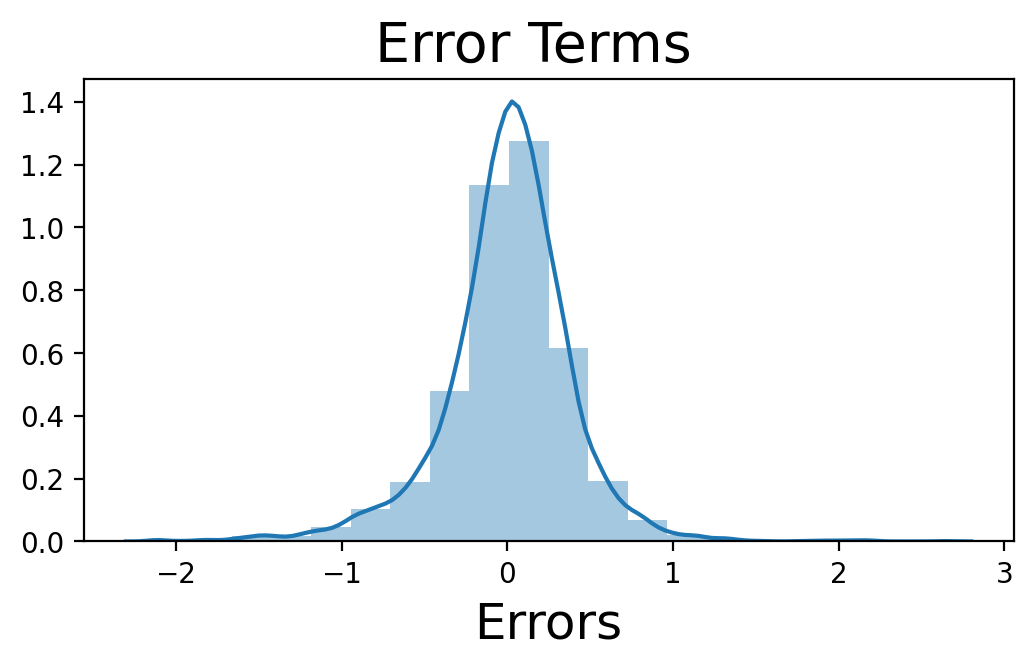

In [404]:
fig = plt.figure(figsize=(6,3))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

Text(0, 0.5, 'Residuals')

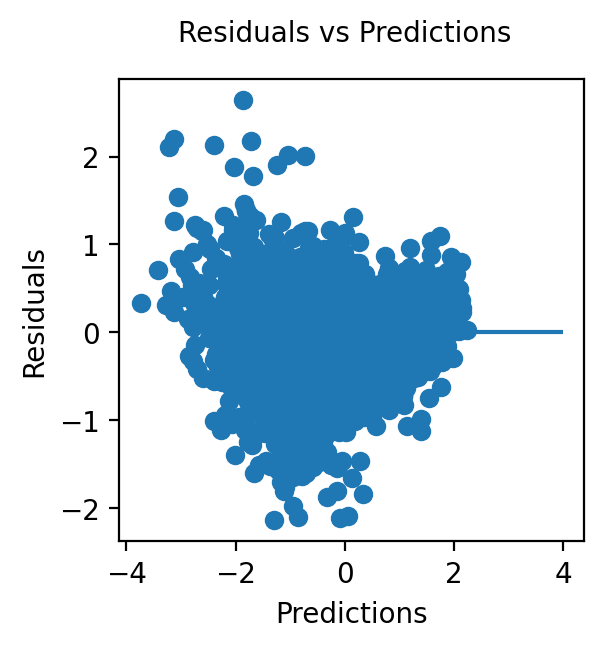

In [405]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.figure(figsize=(3,3))
plt.scatter(y_pred, resid)
plt.hlines(0,-2,4)
plt.suptitle('Residuals vs Predictions', fontsize=10)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

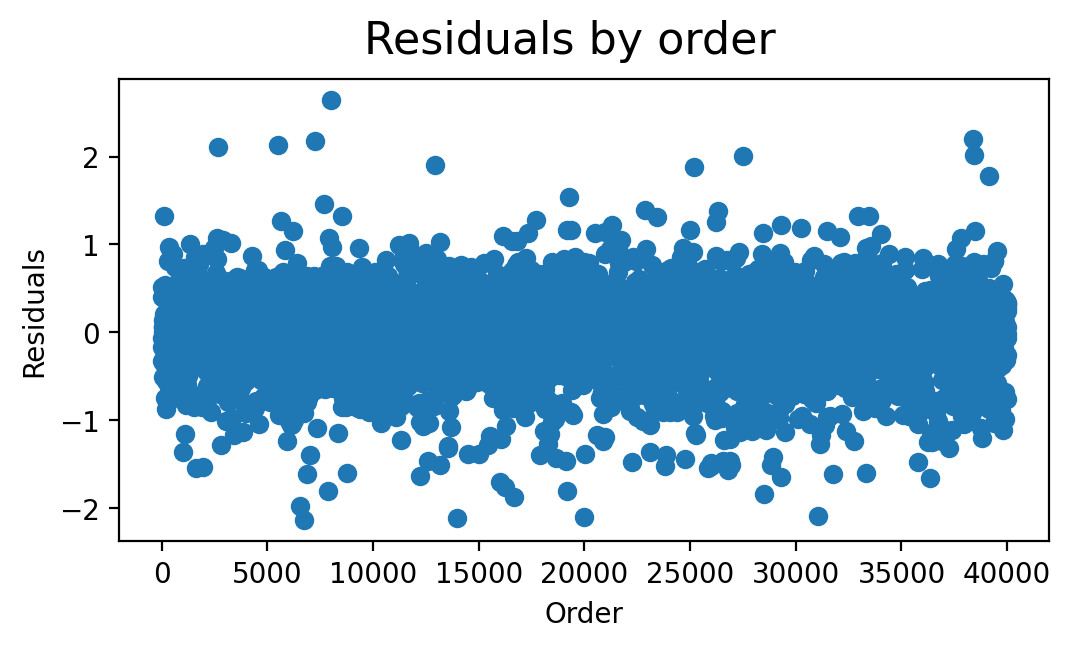

In [406]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.figure(figsize=(6,3))
plt.scatter(resid.index, resid.values)
plt.hlines(0,0,200)
plt.suptitle('Residuals by order', fontsize=16)
plt.xlabel('Order')
plt.ylabel('Residuals')

In [407]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(resid))

[1.98068281]


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


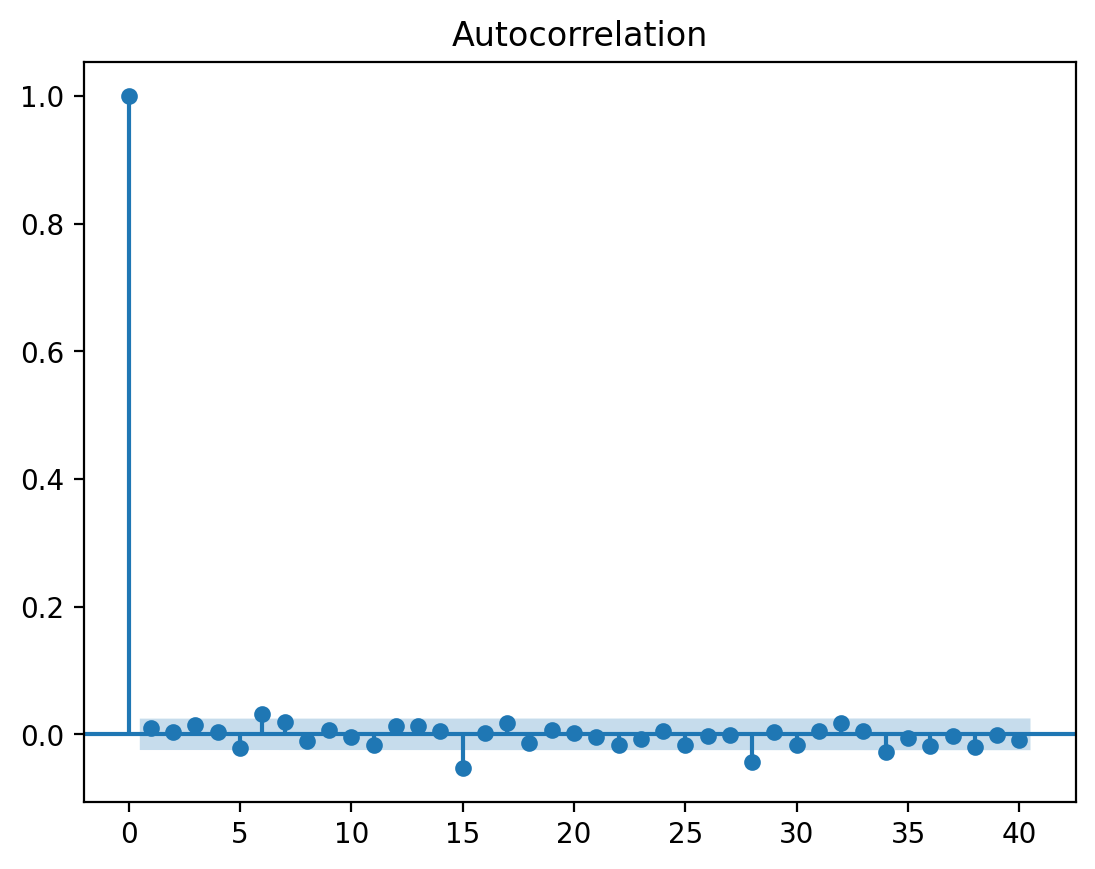

In [408]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(resid, lags=40 , alpha=0.05)
acf.show()

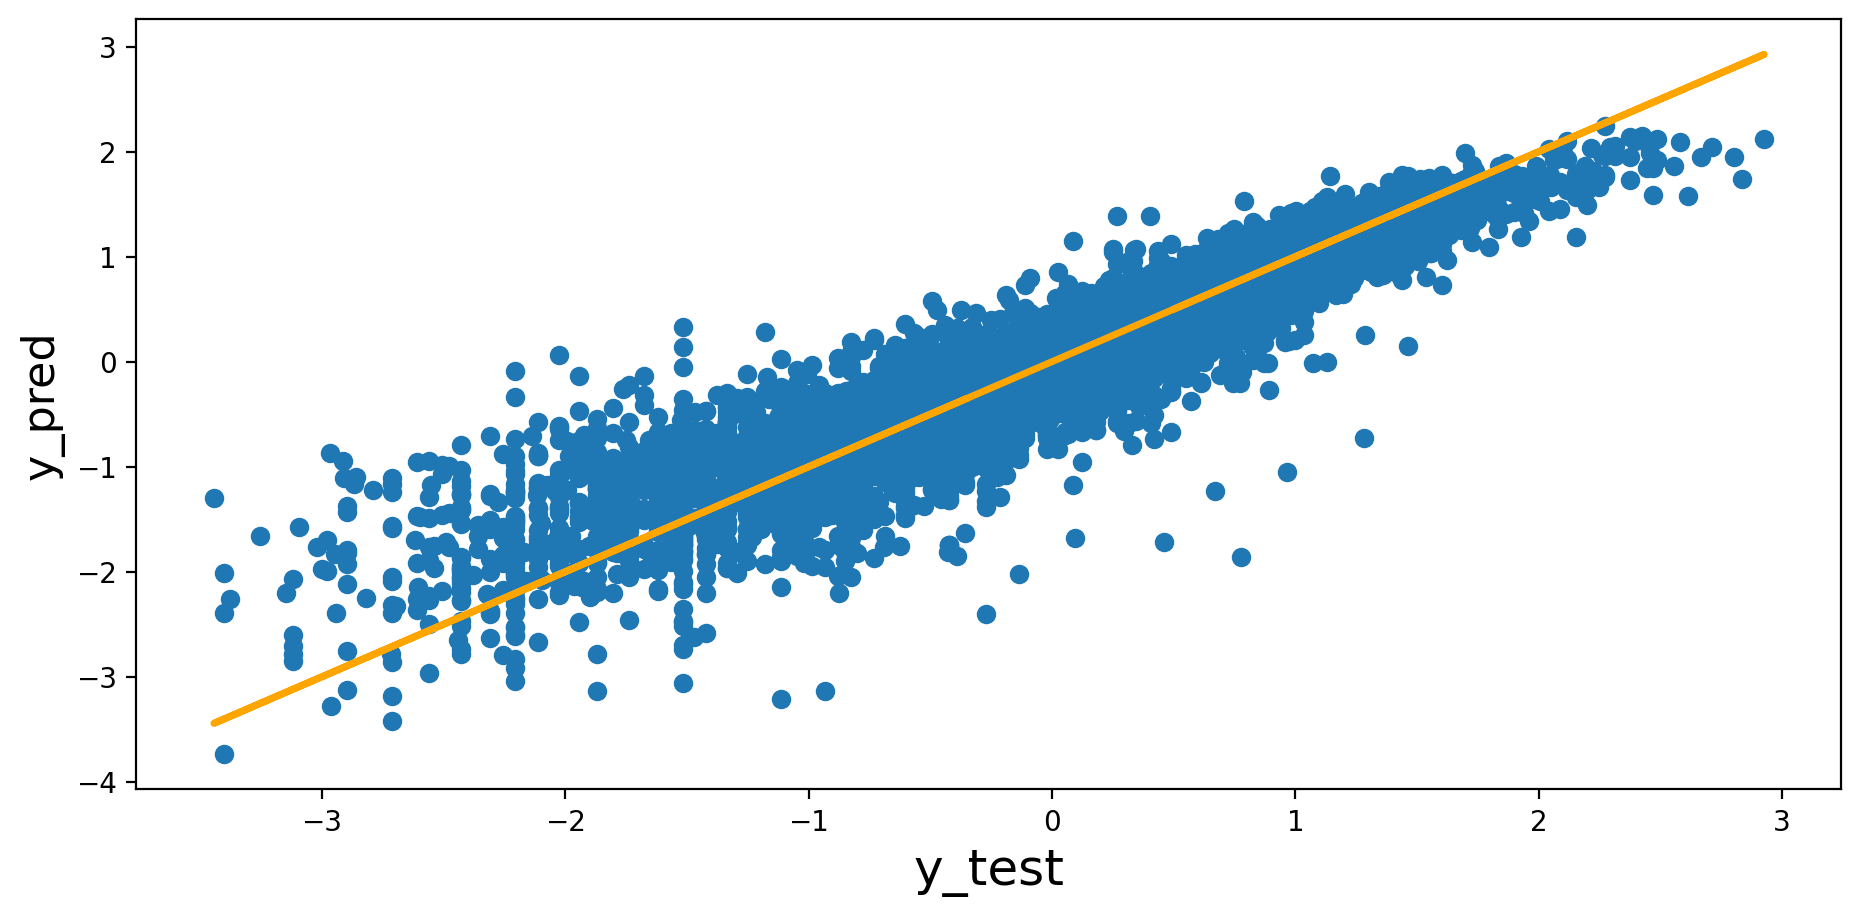

In [409]:
fig = plt.figure(figsize=(11,5))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#Regression Line function
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="orange")


In [410]:
X_train.columns

Index(['const', 'year', 'mileage(kilometers)', 'volume(cm3)', 'with damage',
       'with mileage', 'petrol', 'blue', 'brown', 'burgundy', 'gray', 'green',
       'orange', 'other', 'purple', 'red', 'silver', 'white', 'yellow',
       'mechanics', 'front-wheel drive', 'part-time four-wheel drive',
       'rear drive', 'B', 'C', 'D', 'E', 'F', 'J', 'M', 'S'],
      dtype='object')

In [411]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,294.82
25,D,21.40
24,C,18.72
28,J,17.23
26,E,13.51
29,M,13.18
23,B,9.38
20,front-wheel drive,4.64
22,rear drive,3.08
3,volume(cm3),2.50


In [412]:
#p-value of orange is greater than 0.05
X_train.drop(["orange"], axis = 1, inplace = True)

lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     4837.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:55:58   Log-Likelihood:                -12205.
No. Observations:               25393   AIC:                         2.447e+04
Df Residuals:                   25363   BIC:                         2.471e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [413]:
#p-value of B is greater than 0.05
X_train.drop(["brown"], axis = 1, inplace = True)

lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     5010.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:56:16   Log-Likelihood:                -12206.
No. Observations:               25393   AIC:                         2.447e+04
Df Residuals:                   25364   BIC:                         2.471e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [351]:
#p-value of B is greater than 0.05
X_train.drop(["red"], axis = 1, inplace = True)

lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     3169.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:34:01   Log-Likelihood:                -18107.
No. Observations:               26147   AIC:                         3.627e+04
Df Residuals:                   26119   BIC:                         3.650e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [352]:
#p-value of B is greater than 0.05
X_train.drop(["with mileage"], axis = 1, inplace = True)

lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     3291.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:34:29   Log-Likelihood:                -18107.
No. Observations:               26147   AIC:                         3.627e+04
Df Residuals:                   26120   BIC:                         3.649e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [414]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,294.36
23,D,21.38
22,C,18.71
26,J,17.21
24,E,13.50
27,M,13.18
21,B,9.38
18,front-wheel drive,4.64
20,rear drive,3.08
3,volume(cm3),2.49


In [415]:
#p-value of B is greater than 0.05
X_train.drop(["D"], axis = 1, inplace = True)

lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     5181.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:56:57   Log-Likelihood:                -12236.
No. Observations:               25393   AIC:                         2.453e+04
Df Residuals:                   25365   BIC:                         2.476e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [416]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,191.60
18,front-wheel drive,4.63
20,rear drive,3.08
25,J,2.76
3,volume(cm3),2.44
5,with mileage,2.09
4,with damage,2.07
1,year,2.04
2,mileage(kilometers),1.82
17,mechanics,1.71


In [417]:
X_test.drop(["D","orange","brown"],axis = 1, inplace = True)

In [418]:
y_pred=lm.predict(X_test)

In [419]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8482702288760774

In [421]:
resid = y_test - y_pred.to_frame('priceUSD')
print(durbin_watson(resid))

[1.97798027]


In [423]:
y_pred

3022     0.483292
4792     0.964220
6666     0.322775
33583    0.497305
20996    0.931977
           ...   
14416   -0.252496
12926   -1.098519
31272   -1.430659
8010     0.287402
39146   -0.624182
Length: 6349, dtype: float64

In [428]:
y_pred.to_frame('priceUSD')

,priceUSD
3022,0.483292
4792,0.964220
6666,0.322775
33583,0.497305
20996,0.931977
...,...
14416,-0.252496
12926,-1.098519
31272,-1.430659
8010,0.287402
